In [7]:
import pandas as pd
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("Atendimento_x_Preco.csv")

In [10]:
df

,id,atendimento,preço
0,1,2,1
1,2,2,1
2,3,3,5
3,4,4,2
4,5,4,3
...,...,...,...
2995,2996,4,2
2996,2997,4,5
2997,2998,4,2
2998,2999,4,3


In [4]:
dados = df[["atendimento", "preço"]].values


In [11]:
# Inicializar o MDS para 2 dimensões
mds = MDS(n_components=2, random_state=42)

# Aplicar o MDS nos dados
embedding = mds.fit_transform(dados)

# Resultado
print("Coordenadas no espaço de 2 dimensões:")
print(embedding)

Coordenadas no espaço de 2 dimensões:
[[-1.76827212 -1.52748477]
 [-1.76826495 -1.52749387]
 [-0.11747157  2.25087552]
 ...
 [ 0.36986059 -0.87360156]
 [ 0.53611458  0.1124684 ]
 [ 0.36986059 -0.87360156]]


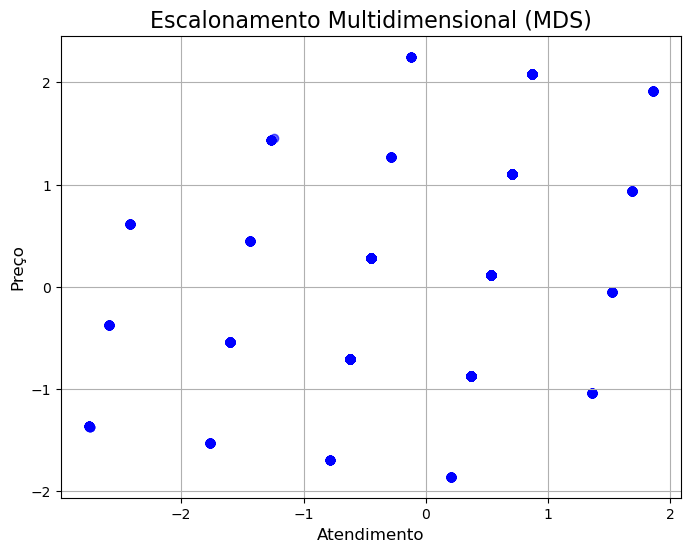

In [13]:
# Criar o DataFrame para visualização
mds_df = pd.DataFrame(embedding, columns=["atendimento", "preço"])

# Gerar o gráfico
plt.figure(figsize=(8, 6))
plt.scatter(mds_df["atendimento"], mds_df["preço"], c="blue", alpha=0.6)
plt.title("Escalonamento Multidimensional (MDS)", fontsize=16)
plt.xlabel("Atendimento", fontsize=12)
plt.ylabel("Preço", fontsize=12)
plt.grid(True)
plt.show()

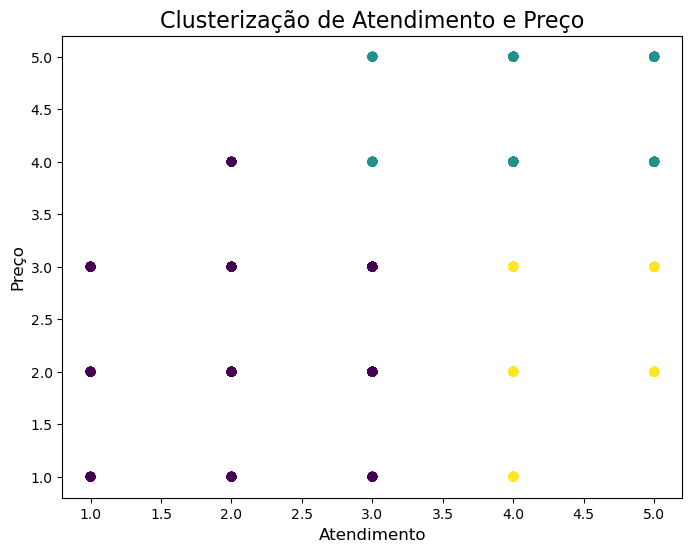

In [14]:
from sklearn.cluster import KMeans

# Configurar e aplicar o K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(df[["atendimento", "preço"]])

# Visualizar os clusters
plt.figure(figsize=(8, 6))
plt.scatter(df["atendimento"], df["preço"], c=df["cluster"], cmap='viridis', alpha=0.7)
plt.title("Clusterização de Atendimento e Preço", fontsize=16)
plt.xlabel("Atendimento", fontsize=12)
plt.ylabel("Preço", fontsize=12)
plt.show()

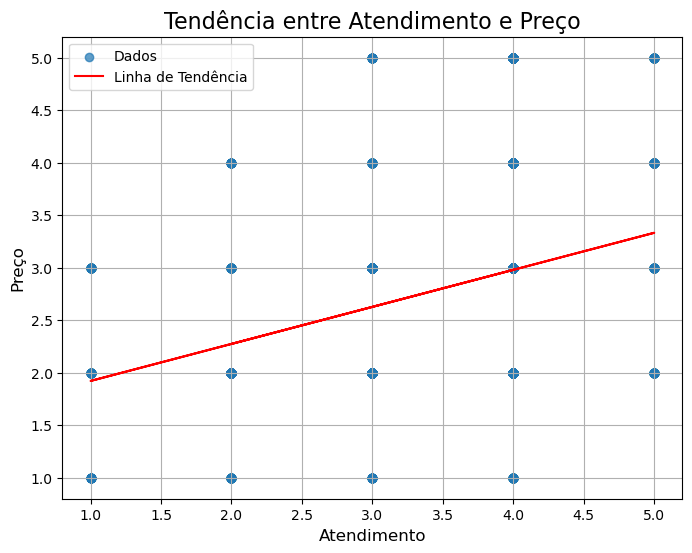

In [15]:
import numpy as np

# Regressão linear simples
coef = np.polyfit(df["atendimento"], df["preço"], 1)
linha_tendencia = np.polyval(coef, df["atendimento"])

# Gráfico com linha de tendência
plt.figure(figsize=(8, 6))
plt.scatter(df["atendimento"], df["preço"], alpha=0.7, label="Dados")
plt.plot(df["atendimento"], linha_tendencia, color='red', label="Linha de Tendência")
plt.title("Tendência entre Atendimento e Preço", fontsize=16)
plt.xlabel("Atendimento", fontsize=12)
plt.ylabel("Preço", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()